In [1]:
import pandas as pd
import numpy as np


from geneticalgorithm2 import geneticalgorithm2 as ga # for creating and running optimization model
from geneticalgorithm2 import Generation, AlgorithmParams # classes for comfortable parameters setting and getting
from geneticalgorithm2 import Crossover, Mutations, Selection # classes for specific mutation and crossover behavior
from geneticalgorithm2 import Population_initializer # for creating better start population
from geneticalgorithm2 import np_lru_cache # for cache function (if u want)
from geneticalgorithm2 import plot_pop_scores # for plotting population scores, if u want
from geneticalgorithm2 import Callbacks # simple callbacks (will be deprecated)

In [2]:
# Load data into pandas DataFrame
df = pd.read_parquet("dataset/unscaled_train_data.parquet")
classes = df["class"].unique()

MO_list = [df[df["class"] == c].mean(axis=0)[:-1].to_numpy() for c in classes ]

In [3]:
#class 0 = sitting, all the others are opposing
parameter_c = .4

def cos_measure(s:np.ndarray,t:np.ndarray):
    return np.dot(s,t)/(np.linalg.norm(s) *np.linalg.norm(t))


def F(s:np.ndarray):
    num = cos_measure(s,MO_list[0]) - parameter_c *\
    (1. - (cos_measure(s,MO_list[1])+cos_measure(s,MO_list[2])+cos_measure(s,MO_list[3])+cos_measure(s,MO_list[4]))/4.)
    denom = 1. + parameter_c
    return num/denom

In [4]:
boundaries = [[0.,1.]]*12
GA_modell = ga(F,dimension=12,
               variable_type=('real'),
               variable_boundaries=boundaries)
''',
                    algorithm_parameters=AlgorithmParams(
                     max_num_iteration = 1000,
                     population_size = 100,
                     mutation_probability = 0.1,
                     mutation_discrete_probability = None,
                     elit_ratio = 0.01,
                     parents_portion = 0.3,
                     crossover_type = 'uniform',
                     mutation_type = 'uniform_by_center',
                     mutation_discrete_type = 'uniform_discrete',
                     selection_type = 'roulette',
                     max_iteration_without_improv = None
                     ))
                     '''

",\n                    algorithm_parameters=AlgorithmParams(\n                     max_num_iteration = 1000,\n                     population_size = 100,\n                     mutation_probability = 0.1,\n                     mutation_discrete_probability = None,\n                     elit_ratio = 0.01,\n                     parents_portion = 0.3,\n                     crossover_type = 'uniform',\n                     mutation_type = 'uniform_by_center',\n                     mutation_discrete_type = 'uniform_discrete',\n                     selection_type = 'roulette',\n                     max_iteration_without_improv = None\n                     ))\n                     "


Set: Average time of function evaluating (secs): 0.00015001058578491212 (total = 0.015001058578491211)

Best score before optimization: -1.041445399145985
____________________ 1.7% GA is running...10 gen from 600...best value = -1.1389195443510907

                                                                                                                                                                                                        
 The best found solution:
 [4.07363719e-02 5.48897431e-03 4.00097998e-01 4.08829063e-01
 3.29779824e-01 6.86866867e-01 8.32687553e-03 5.73362728e-04
 5.74609545e-01 8.73265941e-01 6.36566218e-01 9.70331830e-01]

 Objective function:
 -1.1968373062568556

 Used generations: 600
 Used time: 8.15 seconds


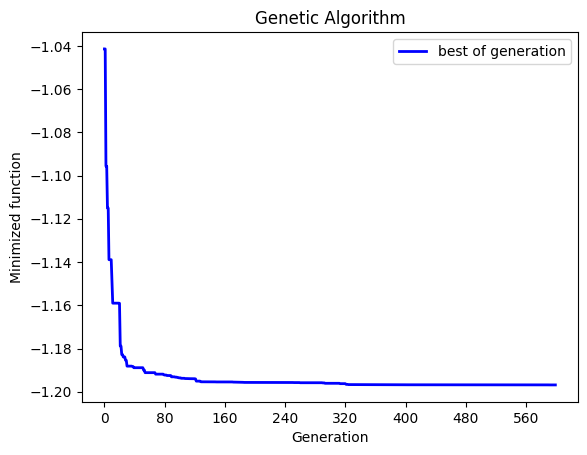

[4.07363719e-02 5.48897431e-03 4.00097998e-01 4.08829063e-01
 3.29779824e-01 6.86866867e-01 8.32687553e-03 5.73362728e-04
 5.74609545e-01 8.73265941e-01 6.36566218e-01 9.70331830e-01]
-1.1968373062568556


AttributeError: 'GAResult' object has no attribute 'last_population'

In [5]:
# all of this parameters are default
result = GA_modell.run()

# best solution
print(result.variable)

# best score    
print(result.score)

# last population
print(result.last_population)